In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


644

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7130ff2caeb6d2724a6cefcb729b6590


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | oistins
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | zyryanka
Processing Record 6 of Set 1 | port shepstone
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | vanavara
Processing Record 13 of Set 1 | san juan
Processing Record 14 of Set 1 | saint-louis
Processing Record 15 of Set 1 | zalantun
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | griffith
Processing Record 20 of Set 1 | udachnyy
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set

Processing Record 39 of Set 4 | yumen
Processing Record 40 of Set 4 | suzun
Processing Record 41 of Set 4 | port-gentil
Processing Record 42 of Set 4 | kloulklubed
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | vegreville
Processing Record 45 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 46 of Set 4 | sibu
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | tommot
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | pandan
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | pamplonita
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | kyaikkami
Processing Record 5 of Set 5 | belaya gora
Processing Record 6 of Set 5 | martinsville
Processing Record 7 of Set 5 | stokmarknes
Processing Record 8 of Set 5 | coalinga
Processing Record 9 of Set 5 | hun
Processing Record 10 of Set 5 | tuburan
Processing Record 11 of

Processing Record 25 of Set 8 | labuhan
Processing Record 26 of Set 8 | rockhampton
Processing Record 27 of Set 8 | marystown
Processing Record 28 of Set 8 | port blair
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | zagyvarekas
Processing Record 31 of Set 8 | priyutnoye
Processing Record 32 of Set 8 | erzin
Processing Record 33 of Set 8 | taldan
Processing Record 34 of Set 8 | hangu
Processing Record 35 of Set 8 | trois-rivieres
Processing Record 36 of Set 8 | thompson
Processing Record 37 of Set 8 | rustenburg
Processing Record 38 of Set 8 | namie
Processing Record 39 of Set 8 | aksu
Processing Record 40 of Set 8 | ciudad bolivar
Processing Record 41 of Set 8 | sompeta
Processing Record 42 of Set 8 | kudahuvadhoo
Processing Record 43 of Set 8 | talaya
Processing Record 44 of Set 8 | chiriqui grande
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 47 of

Processing Record 11 of Set 12 | kargasok
Processing Record 12 of Set 12 | korzhevskiy
Processing Record 13 of Set 12 | aliganj
Processing Record 14 of Set 12 | kualakapuas
Processing Record 15 of Set 12 | baiyin
Processing Record 16 of Set 12 | mendota
Processing Record 17 of Set 12 | nara
Processing Record 18 of Set 12 | pacifica
Processing Record 19 of Set 12 | juneau
Processing Record 20 of Set 12 | shar
Processing Record 21 of Set 12 | tiznit
Processing Record 22 of Set 12 | paramonga
Processing Record 23 of Set 12 | lambarene
Processing Record 24 of Set 12 | aketi
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | awjilah
Processing Record 27 of Set 12 | lebedinyy
Processing Record 28 of Set 12 | haimen
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | salalah
Processing Record 31 of Set 12 | plettenberg bay
Processing Record 32 of Set 12 | pouebo
Processing Record 33 of Set 12 | sept-iles
Processing Record 34 of Set 12 | h

In [10]:
len(city_data)

589

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,53.01,76,100,3.00,AU,2021-04-16 20:32:18
1,Vaini,-21.2000,-175.2000,77.00,69,20,4.61,TO,2021-04-16 20:34:25
2,Oistins,13.0667,-59.5333,82.40,57,40,17.27,BB,2021-04-16 20:41:53
3,Mount Gambier,-37.8333,140.7667,50.00,81,90,8.05,AU,2021-04-16 20:32:59
4,Zyryanka,65.7500,150.8500,6.06,91,75,11.65,RU,2021-04-16 20:41:53
5,Port Shepstone,-30.7414,30.4550,65.86,55,100,4.25,ZA,2021-04-16 20:41:54
6,Saint-Philippe,-21.3585,55.7679,78.80,73,0,4.61,RE,2021-04-16 20:37:52
7,Ribeira Grande,38.5167,-28.7000,62.60,100,75,16.11,PT,2021-04-16 20:41:54
8,Mar Del Plata,-38.0023,-57.5575,66.20,88,40,6.91,AR,2021-04-16 20:41:55
9,Mataura,-46.1927,168.8643,43.00,94,95,5.01,NZ,2021-04-16 20:41:55


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-04-16 20:32:18,-42.7826,147.0587,53.01,76,100,3.00
1,Vaini,TO,2021-04-16 20:34:25,-21.2000,-175.2000,77.00,69,20,4.61
2,Oistins,BB,2021-04-16 20:41:53,13.0667,-59.5333,82.40,57,40,17.27
3,Mount Gambier,AU,2021-04-16 20:32:59,-37.8333,140.7667,50.00,81,90,8.05
4,Zyryanka,RU,2021-04-16 20:41:53,65.7500,150.8500,6.06,91,75,11.65
5,Port Shepstone,ZA,2021-04-16 20:41:54,-30.7414,30.4550,65.86,55,100,4.25
6,Saint-Philippe,RE,2021-04-16 20:37:52,-21.3585,55.7679,78.80,73,0,4.61
7,Ribeira Grande,PT,2021-04-16 20:41:54,38.5167,-28.7000,62.60,100,75,16.11
8,Mar Del Plata,AR,2021-04-16 20:41:55,-38.0023,-57.5575,66.20,88,40,6.91
9,Mataura,NZ,2021-04-16 20:41:55,-46.1927,168.8643,43.00,94,95,5.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

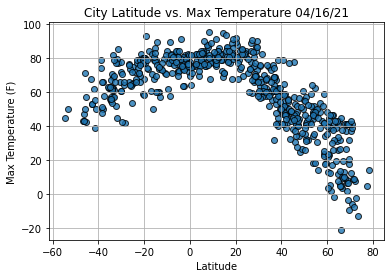

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

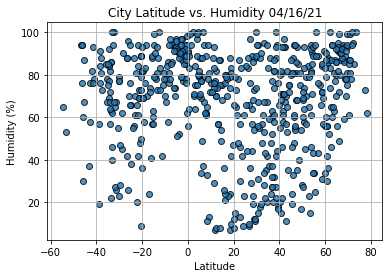

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

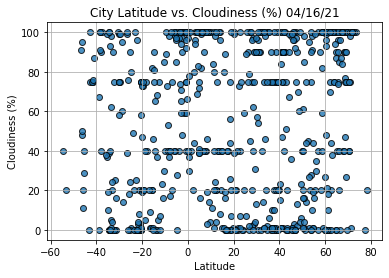

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

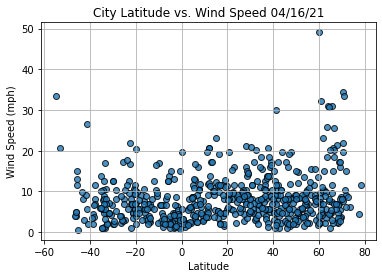

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Zalantun
Country                        CN
Date          2021-04-16 20:41:56
Lat                          48.0
Lng                      122.7167
Max Temp                    24.89
Humidity                       85
Cloudiness                     70
Wind Speed                    8.3
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0.

0      False
1      False
2       True
3      False
4       True
       ...  
584    False
585     True
586     True
587    False
588    False
Name: Lat, Length: 589, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Oistins,BB,2021-04-16 20:41:53,13.0667,-59.5333,82.40,57,40,17.27
4,Zyryanka,RU,2021-04-16 20:41:53,65.7500,150.8500,6.06,91,75,11.65
7,Ribeira Grande,PT,2021-04-16 20:41:54,38.5167,-28.7000,62.60,100,75,16.11
10,Vanavara,RU,2021-04-16 20:38:18,60.3400,102.2797,12.78,79,93,9.55
12,Saint-Louis,SN,2021-04-16 20:41:56,16.3333,-15.0000,86.29,21,0,19.10


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

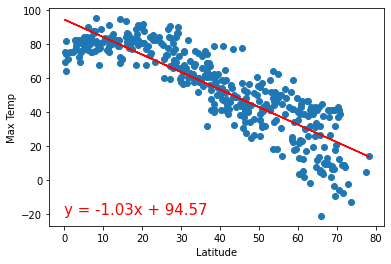

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp",(0,-20))


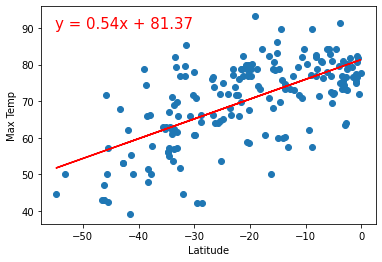

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))


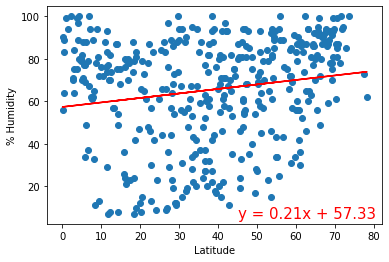

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,5))

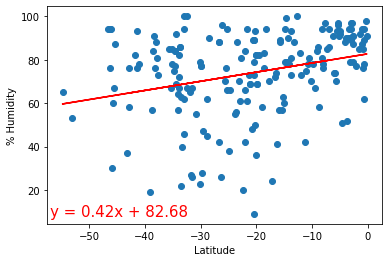

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-57,8))

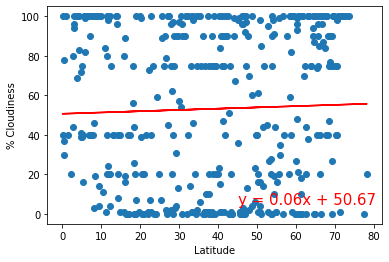

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,5))

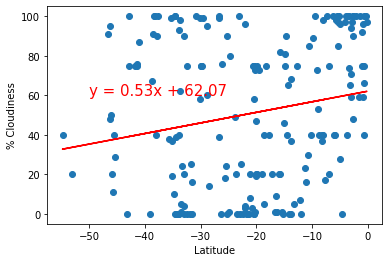

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

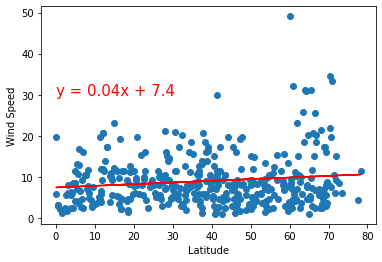

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,30))


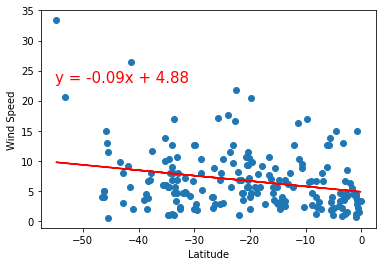

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,23))
